In [4]:
!pip install textblob

In [5]:
!pip install wordcloud

In [6]:
!pip install pdfminer.six

In [18]:
pip install --upgrade wordcloud

Hello! please, enter a word you'd like to search:  attachment


The word attachment has a probability of 0.0127 to appear in the text


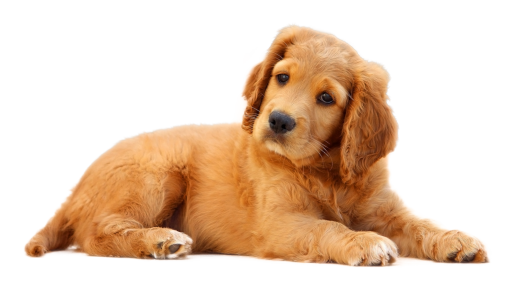

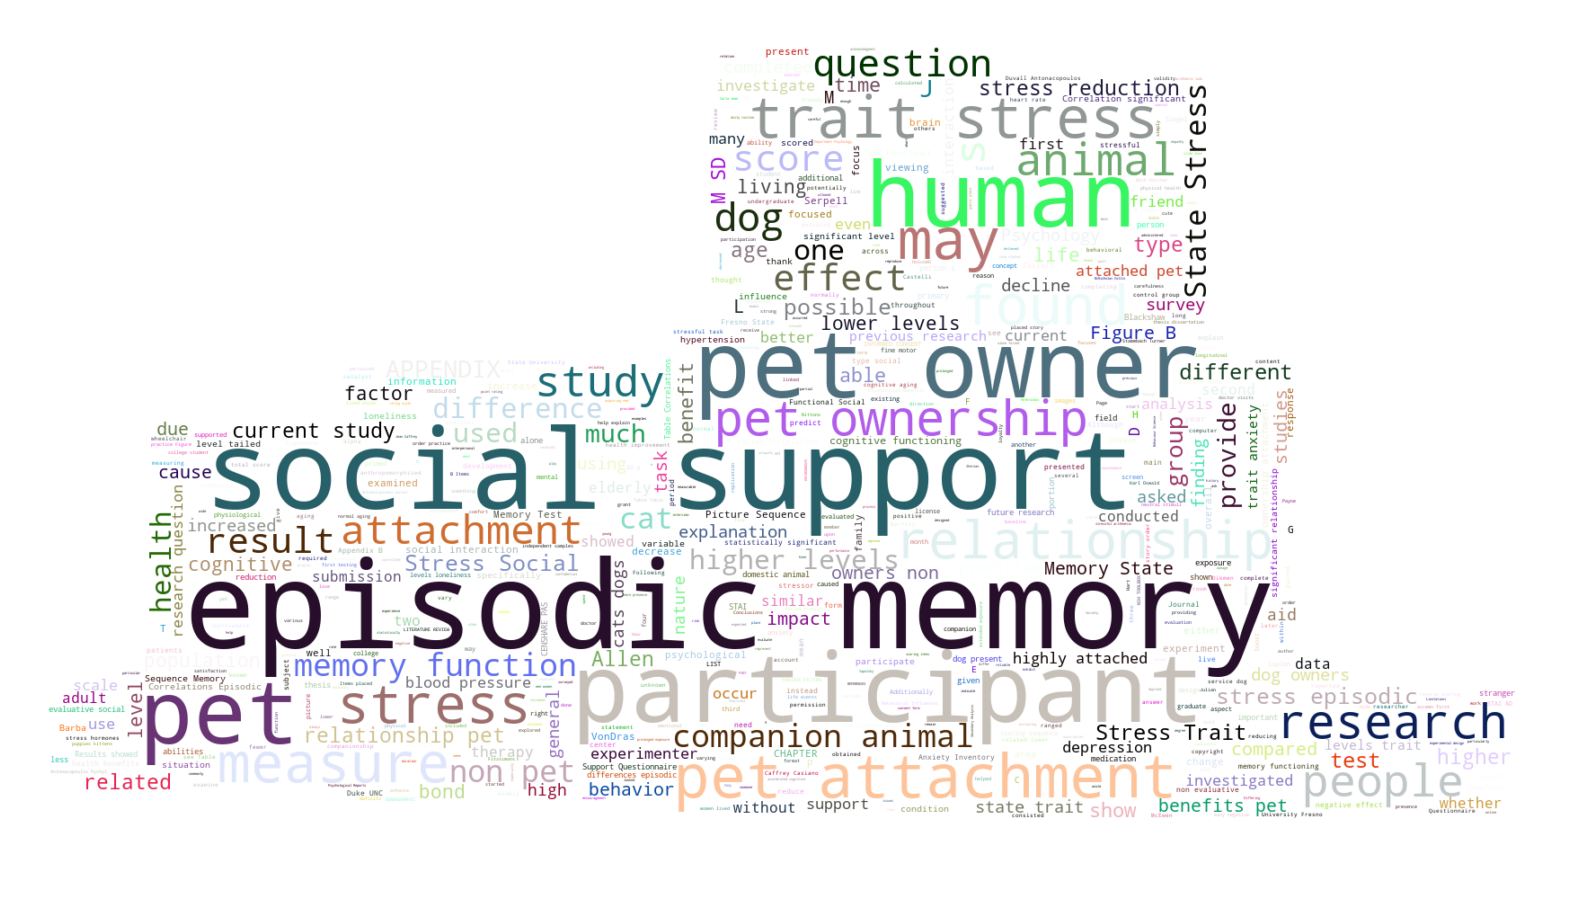

In [10]:
#importing packages
import pdfminer
import io
import random
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage

#importing packages for cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#defining function 
#reference: http://www.blog.pythonlibrary.org/2018/05/03/exporting-data-from-pdfs-with-python/
def extract_text_from_pdf(pdf_path):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)
    with open(pdf_path, 'rb') as fh:
        for page in PDFPage.get_pages(fh, 
                                      caching=True,
                                      check_extractable=True):
            page_interpreter.process_page(page)
        text = fake_file_handle.getvalue()
    # close open handles
    converter.close()
    fake_file_handle.close()
    if text:
        return text

#executing function and printing text
text = extract_text_from_pdf(r'C:\Users\price\Downloads\CAFFREY_CASIANO_Carla.pdf')

#--------------------------------------------------------------------------------------

#removing numbers
def remove_num(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text

#executing function
text = np.vectorize(remove_num)(text)

#--------------------------------------------------------------------------------------
#removing punctuation
from string import punctuation
def remove_punct(text):
    text = ' '.join(word.strip(punctuation) for word in text.split() if word.strip(punctuation))
    return text

#executing function
text = np.vectorize(remove_punct)(text)

#--------------------------------------------------------------------------------------

#removing other characters
def remove_u(text):
    text = text.replace('_','')
    text = text.replace('?','')
    text = text.replace('•','')
    text = text.replace("@",'')
    text = text.replace('▯','')
    text = text.replace("'",'')
    text = text.replace(",","")
    return text

#executing function
text = np.vectorize(remove_u)(text)

#--------------------------------------------------------------------------------------

#removing extra spaces
def remove_extra_space(text):
    word_list = text.split()
    text = ' '.join(word_list)
    return text

#executing function
text = np.vectorize(remove_extra_space)(text)

#--------------------------------------------------------------------------------------

#removing very common words
#reference: https://gist.github.com/sebleier/554280
stop_words = ["et", "al", "also", "Dr", "would", "I", "The", "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the","Mr", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
def remove_stopwords(text):
    word_list = text.split()
    word_list = [word for word in word_list if word not in stop_words]
    text = ' '.join(word_list)
    return text

#executing function
text = np.vectorize(remove_stopwords)(text)
text = text.tolist()

#--------------------------------------------------------------------------------------

#setting mask image
mask = np.array(Image.open(r'C:\Users\price\Downloads\another dog.png'))
plt.imshow(mask)
plt.axis("off")

# lower max_font_size, change the maximum number of word and lighten the background:
from wordcloud import ImageColorGenerator

#--------------------------------------------------------------------------------------

#ask the user for the word they want to search
searchWord = input("Hello! please, enter a word you'd like to search: ")

#count the total numbers of words
totalWords = len(text.split())

#separate the words into a list
separateWords = text.split()

#count how many times the word is in the text
wordFrecuency = separateWords.count(searchWord)

#probability of a word to appear in the text
probability = wordFrecuency / totalWords
wordToString = f"{probability:.4f}"

print("The word " + searchWord + " has a probability of " + wordToString + " to appear in the text")


#creating wordcloud
wordcloud = WordCloud(mask=mask, width=2000, height=1000,contour_color="white", max_words=10000,relative_scaling = 0.5, background_color = "black").generate(text)

def randomColor(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    hue = random.randint(0, 360)
    saturation = random.randint(0, 100)
    luminosity = random.randint(0, 100)
    return "hsl({}, {}%, {}%)".format(hue, saturation, luminosity )

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,15])
plt.imshow(wordcloud.recolor(color_func=randomColor), interpolation="bilinear")
plt.axis("off")
_=plt.show()

